# Horse Colic Death Prediction

Samantha Maillie 

There is a common joke made in the horse world: "Everything kills horses". It is in some ways truthful. They are fragile animals. Their body type means a broken leg or foot can be fatal for these animals. There is a lot of effort put into keeping horse's legs as protected as possible. This is particularly focused on with competition horses. Many people think of racehorses but there are many different sports within the equestrian community and people from all disciplines will tell you the same thing: "Horses are a handful". There is a lot of money involved of course but also to most of these riders their horse is their teammate. A beloved partner they will do anything to protect. Leg injuries are more prevalent issues within competitive horses. However, all horse owners need to be careful to prevent colic. A very simplified explanation of colic is actually a symptom a 'stomach ache' indicating sometimes-serious digestive tract issues. This can prove fatal and once it starts sometimes its impossible to stop before it becomes a fatal condition. The problem? Colic can be caused by anything. The way I have explained it over my years working with horses is this: think of all the times you have had to vomit. Think about any pets you have had that have had to throw up. In each case the body was doing that for a reason. Horses can't throw up. That is sometimes where we start to see problems like colic. If a dog gets into the cabinet and eats too much food maybe she's a little sick. If a horse does its a life or death scenario. Changes in eating habits can also instigate colic. There is something referred to as a sand colic where a horse eats too much off the ground and ends up with sand in their stomach. The list could continue. The point is it is incredibly easy. This project may not be the most important to everyone but to this passionate community of equestrians it is critically important to have the best information available to keep these horses healthy.

# My Background

The majority of the information I am providing within this project comes from working with these animals all of my life. I am certified on a national level in regards to horse care. I have spent a lot of time working with these animals and have had numerous first hand experiences dealing with horses that were colicking. My background is where my interest in this project grew from. 

# Dataset Description

This dataset is from Kaggle, which pulled it from UCI Machine Learning databases. The data was collected to attempt to learn how to best predict whether the horse will survive. There are numerous predictors regarding the horse’s health. Death and euthanasia are both considered as the same outcome for this research.

# Preliminary Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
horse = pd.read_csv("horse.csv")

In [3]:
horse.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [4]:
horse.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

## Make Dead or Alive Variable

In [5]:
horse["alive"] = horse["outcome"]
horse["alive"] = np.where(horse["alive"] =='dead', 'dead', horse["alive"])
horse["alive"] = np.where(horse["alive"] =='lived', 'alive', horse["alive"])
horse["alive"] = np.where(horse["alive"] =='euthanized', 'dead', horse["alive"]) 
horse["alive"] = np.where(horse["alive"] =='died', 'dead', horse["alive"]) 
horse["alive"].unique()

array(['dead', 'alive'], dtype=object)

In [6]:
horse["alive"] = np.where(horse["alive"] =='dead', '1', horse["alive"])
horse["alive"] = np.where(horse["alive"] =='alive', '0', horse["alive"])
horse["alive"].unique()

array(['1', '0'], dtype=object)

## Hospital Number and cp_data are not relevant

In [7]:
horse = horse.drop(['hospital_number', 'cp_data'], axis=1)

## Deal With NAs 

In [8]:
horse.shape # n = 299 , p = 26

(299, 27)

In [9]:
horse.isnull().sum()

surgery                    0
age                        0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
alive                      0
dtype: int64

# Numerical Variables, handling NA's mean or median?

## Rectal Temp

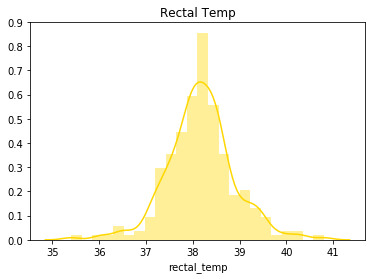

Percent Missing 20.07 %


In [10]:
sns.distplot(horse["rectal_temp"].loc[~horse["rectal_temp"].isnull()], color = "gold")
plt.title("Rectal Temp")
#plt.savefig('rt1.png')
plt.show()
missing = (horse["rectal_temp"].isnull().sum())/len(horse["rectal_temp"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

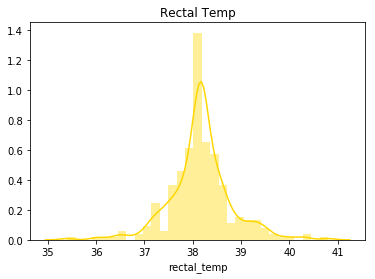

In [11]:
horse["rectal_temp"]=horse["rectal_temp"].fillna(horse["rectal_temp"].mean())
sns.distplot(horse["rectal_temp"], color = "gold")
plt.title("Rectal Temp")
#plt.savefig('rt2.png')
plt.show()

## Pulse

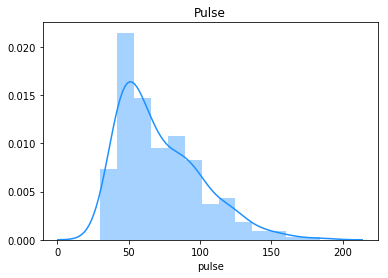

Percent Missing 8.03 %


In [12]:
sns.distplot(horse["pulse"].loc[~horse["pulse"].isnull()], color = "dodgerblue")
plt.title("Pulse")
#plt.savefig('p1.png')
plt.show()
missing = (horse["pulse"].isnull().sum())/len(horse["pulse"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

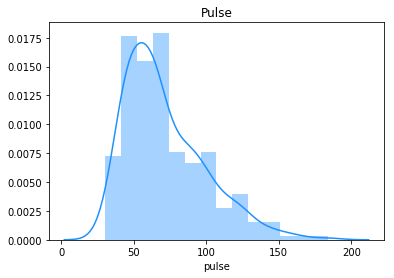

In [13]:
horse["pulse"]=horse["pulse"].fillna(horse["pulse"].median())
sns.distplot(horse["pulse"], color = "dodgerblue")
plt.title("Pulse")
#plt.savefig('p2.png')
plt.show()

## Respiratory Rate

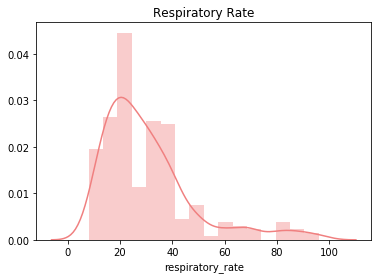

Percent Missing 19.4 %


In [14]:
sns.distplot(horse["respiratory_rate"].loc[~horse["respiratory_rate"].isnull()], color = "lightcoral")
plt.title("Respiratory Rate")
#plt.savefig('rr1.png')
plt.show()
missing = (horse["respiratory_rate"].isnull().sum())/len(horse["respiratory_rate"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

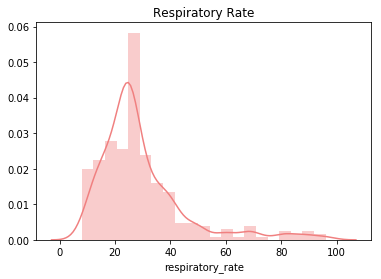

In [15]:
horse["respiratory_rate"]=horse["respiratory_rate"].fillna(horse["respiratory_rate"].median())
sns.distplot(horse["respiratory_rate"], color = "lightcoral")
plt.title("Respiratory Rate")
#plt.savefig('rr2.png')
plt.show()

## Nasogastric Reflux PH

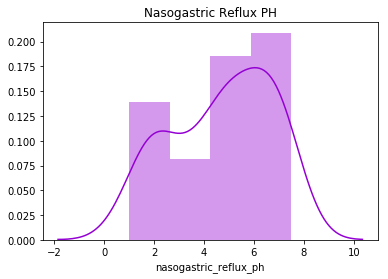

Percent Missing 82.27 %


In [16]:
sns.distplot(horse["nasogastric_reflux_ph"].loc[~horse["nasogastric_reflux_ph"].isnull()], color = "darkviolet")
plt.title("Nasogastric Reflux PH")
#plt.savefig('nrp1.png')
plt.show()
missing = (horse["nasogastric_reflux_ph"].isnull().sum())/len(horse["nasogastric_reflux_ph"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

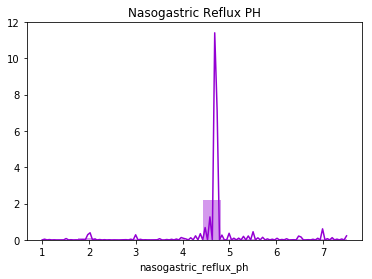

In [17]:
horse["nasogastric_reflux_ph"]=horse["nasogastric_reflux_ph"].fillna(horse["nasogastric_reflux_ph"].mean())
sns.distplot(horse["nasogastric_reflux_ph"], color = "darkviolet")
plt.title("Nasogastric Reflux PH")
#plt.savefig('nrp2.png')
plt.show()

## Packed Cell Volume

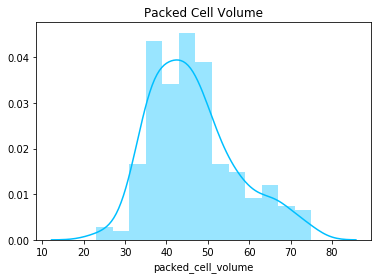

Percent Missing 9.7 %


In [18]:
sns.distplot(horse["packed_cell_volume"].loc[~horse["packed_cell_volume"].isnull()], color = "deepskyblue")
plt.title("Packed Cell Volume")
#plt.savefig('pcv1.png')
plt.show()
missing = (horse["packed_cell_volume"].isnull().sum())/len(horse["packed_cell_volume"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

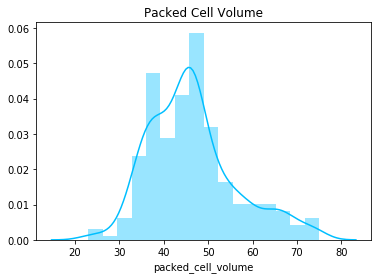

In [19]:
horse["packed_cell_volume"]=horse["packed_cell_volume"].fillna(horse["packed_cell_volume"].mean())
sns.distplot(horse["packed_cell_volume"], color = "deepskyblue")
plt.title("Packed Cell Volume")
#plt.savefig('pcv2.png')
plt.show()

## Total Protein

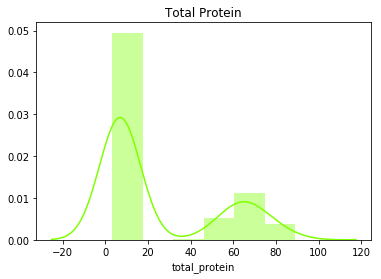

Percent Missing 11.04 %


In [20]:
sns.distplot(horse["total_protein"].loc[~horse["total_protein"].isnull()], color = "chartreuse")
plt.title("Total Protein")
#plt.savefig('tp1.png')
plt.show()
missing = (horse["total_protein"].isnull().sum())/len(horse["total_protein"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

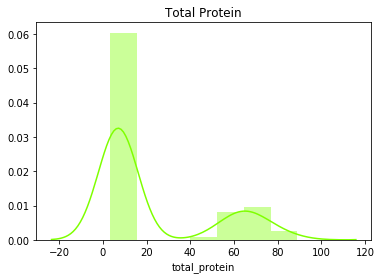

In [21]:
horse["total_protein"]=horse["total_protein"].fillna(horse["total_protein"].median())
sns.distplot(horse["total_protein"], color = "chartreuse")
plt.title("Total Protein")
#plt.savefig('tp2.png')
plt.show()

## Abdomo Protein

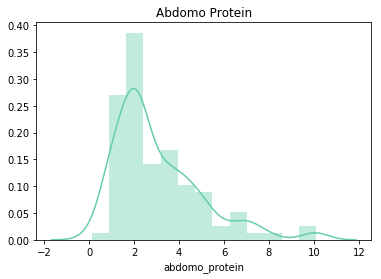

Percent Missing 66.22 %


In [22]:
sns.distplot(horse["abdomo_protein"].loc[~horse["abdomo_protein"].isnull()], color = "mediumaquamarine")
plt.title("Abdomo Protein")
#plt.savefig('ap1.png')
plt.show()
missing = (horse["abdomo_protein"].isnull().sum())/len(horse["abdomo_protein"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

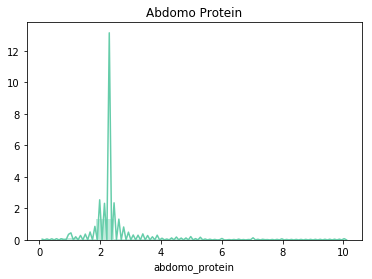

In [23]:
horse["abdomo_protein"]=horse["abdomo_protein"].fillna(horse["abdomo_protein"].median())
sns.distplot(horse["abdomo_protein"], color = "mediumaquamarine")
plt.title("Abdomo Protein")
#plt.savefig('ap2.png')
plt.show()

# Categorical NA's

## Temp of Extremities

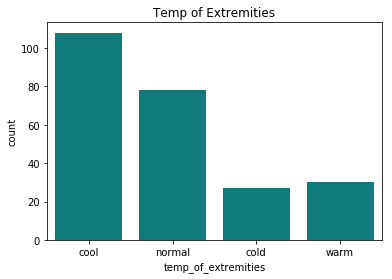

Percent Missing 18.73 %


In [24]:
sns.countplot(horse["temp_of_extremities"], color = "darkcyan")
plt.title("Temp of Extremities")
#plt.savefig('te.png')
plt.show()
missing = (horse["temp_of_extremities"].isnull().sum())/len(horse["temp_of_extremities"])
missing = (round(missing, 4))*100
print("Percent Missing {} %" .format(missing))

## Peripheral Pulse

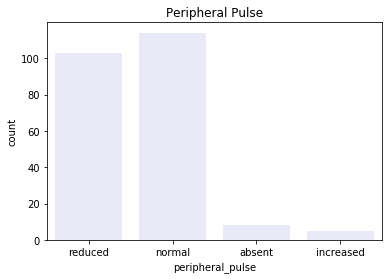

Percent Missing 23.08 %


In [25]:
sns.countplot(horse["peripheral_pulse"], color = "lavender")
plt.title("Peripheral Pulse")
#plt.savefig('pp.png')
plt.show()
missing = (horse["peripheral_pulse"].isnull().sum())/len(horse["peripheral_pulse"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

## Mucous Membrane

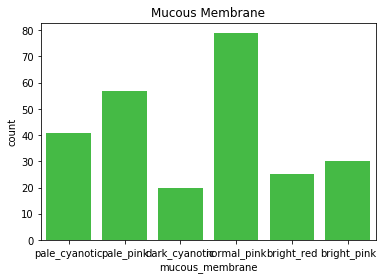

Percent Missing 15.72 %


In [26]:
sns.countplot(horse["mucous_membrane"], color = "limegreen")
plt.title("Mucous Membrane")
#plt.savefig('mm.png')
plt.show()
missing = (horse["mucous_membrane"].isnull().sum())/len(horse["mucous_membrane"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

## Capillary Refill Time

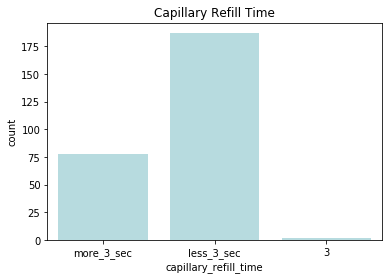

Percent Missing 10.7 %


In [27]:
sns.countplot(horse["capillary_refill_time"], color = "powderblue")
plt.title("Capillary Refill Time")
#plt.savefig('crt.png')
plt.show()
missing = (horse["capillary_refill_time"].isnull().sum())/len(horse["capillary_refill_time"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

## Pain

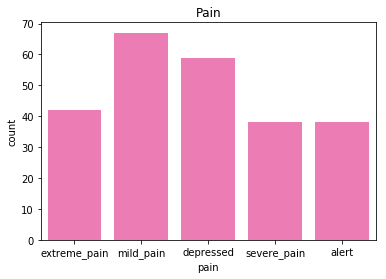

Percent Missing 18.39 %


In [28]:
sns.countplot(horse["pain"], color = "hotpink")
plt.title("Pain")
#plt.savefig('p.png')
plt.show()
missing = (horse["pain"].isnull().sum())/len(horse["pain"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

## Peristalsis

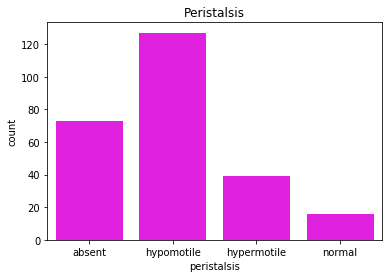

Percent Missing 14.72 %


In [29]:
sns.countplot(horse["peristalsis"], color = "fuchsia")
plt.title("Peristalsis")
#plt.savefig('per.png')
plt.show()
missing = (horse["peristalsis"].isnull().sum())/len(horse["peristalsis"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

## Abdominal Distention

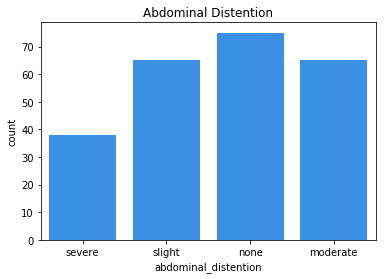

Percent Missing 18.73 %


In [30]:
sns.countplot(horse["abdominal_distention"], color = "dodgerblue")
plt.title("Abdominal Distention")
#plt.savefig('ad.png')
plt.show()
missing = (horse["abdominal_distention"].isnull().sum())/len(horse["abdominal_distention"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

## Nasogastric Tube

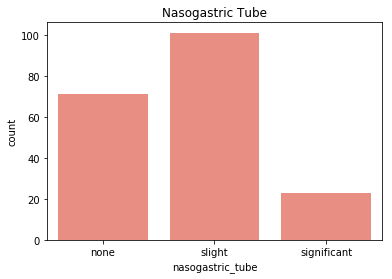

Percent Missing 34.78 %


In [31]:
sns.countplot(horse["nasogastric_tube"], color = "salmon")
plt.title("Nasogastric Tube")
#plt.savefig('nt.png')
plt.show()
missing = (horse["nasogastric_tube"].isnull().sum())/len(horse["nasogastric_tube"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

## Nasogastric Reflux

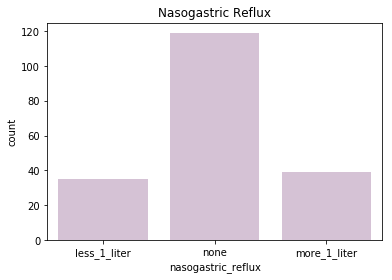

Percent Missing 35.45 %


In [32]:
sns.countplot(horse["nasogastric_reflux"], color = "thistle")
plt.title("Nasogastric Reflux")
#plt.savefig('nr.png')
plt.show()
missing = (horse["nasogastric_reflux"].isnull().sum())/len(horse["nasogastric_reflux"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

## Rectal Exam Feces

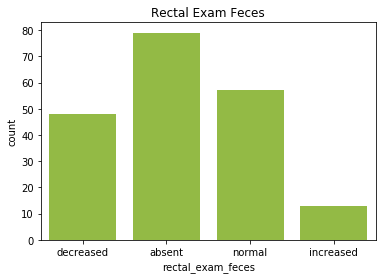

Percent Missing 34.11 %


In [33]:
sns.countplot(horse["rectal_exam_feces"], color = "yellowgreen")
plt.title("Rectal Exam Feces")
#plt.savefig('ref.png')
plt.show()
missing = (horse["rectal_exam_feces"].isnull().sum())/len(horse["rectal_exam_feces"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

## Abdomen

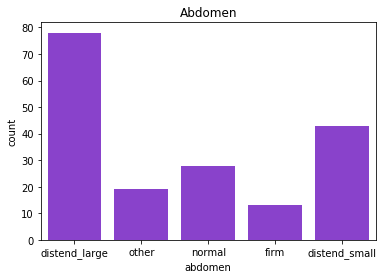

Percent Missing 39.46 %


In [34]:
sns.countplot(horse["abdomen"], color = "blueviolet")
plt.title("Abdomen")
#plt.savefig('a.png')
plt.show()
missing = (horse["abdomen"].isnull().sum())/len(horse["abdomen"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

## Abdomo Appearance

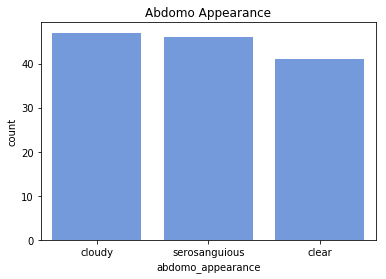

Percent Missing 55.18 %


In [35]:
sns.countplot(horse["abdomo_appearance"], color = "cornflowerblue")
plt.title("Abdomo Appearance")
#plt.savefig('aa.png')
plt.show()
missing = (horse["abdomo_appearance"].isnull().sum())/len(horse["abdomo_appearance"])
missing = missing*100
missing = round(missing, 2)
print("Percent Missing {} %" .format(missing))

## Number Alive vs Number Dead

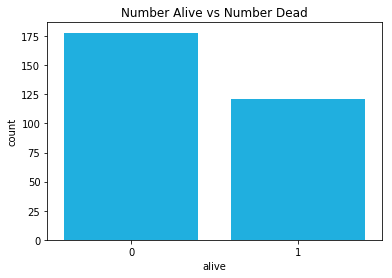

In [36]:
sns.countplot(horse["alive"], color = "deepskyblue")
plt.title("Number Alive vs Number Dead")
#plt.savefig('outcome.png')
plt.show()

## Creating dummy variables for categorical

In [37]:
hold = horse["alive"]
hold
horse = pd.get_dummies(horse)
horse['alive'] = hold
horse = horse.drop(['alive_0', 'alive_1'], axis=1)
horse.head()

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,...,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,outcome_died,outcome_euthanized,outcome_lived,surgical_lesion_no,surgical_lesion_yes,alive
0,38.5,66.0,28.0,4.707547,45.0,8.4,2.3,11300,0,0,...,0,0,0,0,1,0,0,1,0,1
1,39.2,88.0,20.0,4.707547,50.0,85.0,2.0,2208,0,0,...,1,0,1,0,0,1,0,1,0,1
2,38.3,40.0,24.0,4.707547,33.0,6.7,2.3,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,39.1,164.0,84.0,5.000000,48.0,7.2,5.3,2208,0,0,...,0,0,0,1,1,0,0,0,1,1
4,37.3,104.0,35.0,4.707547,74.0,7.4,2.3,4300,0,0,...,0,0,0,0,1,0,0,1,0,1


In [38]:
horse["alive"]= horse["alive"].astype('int64', copy=False)

# Making sure we got all the NA's

In [39]:
horse.isnull().sum()

rectal_temp                         0
pulse                               0
respiratory_rate                    0
nasogastric_reflux_ph               0
packed_cell_volume                  0
total_protein                       0
abdomo_protein                      0
lesion_1                            0
lesion_2                            0
lesion_3                            0
surgery_no                          0
surgery_yes                         0
age_adult                           0
age_young                           0
temp_of_extremities_cold            0
temp_of_extremities_cool            0
temp_of_extremities_normal          0
temp_of_extremities_warm            0
peripheral_pulse_absent             0
peripheral_pulse_increased          0
peripheral_pulse_normal             0
peripheral_pulse_reduced            0
mucous_membrane_bright_pink         0
mucous_membrane_bright_red          0
mucous_membrane_dark_cyanotic       0
mucous_membrane_normal_pink         0
mucous_membr

## Split into Train and Test Data 

In [40]:
X_tr, X_te, y_tr, y_te = train_test_split(horse.iloc[:,0:67], horse.iloc[:,67:68], test_size=0.25, random_state=42)

# Model Selection

I run a few different classification algorithms and compare their scores to decide which method to move forward with. Logistic regression I ran using only pulse as a predictor as well as the full X matrix. 

## Logistic Regression

In [41]:
logisticRegr = LogisticRegression()
pulse = horse["pulse"].reshape(-1,1)
alive = horse["alive"]
pulse = pulse.reshape(-1,1)

pulse_tr = pulse[1:265]
pulse_te = pulse[265:275]

alive_tr = alive[1:265]
alive_te = alive[265:275]


logisticRegr.fit(pulse_tr, alive_tr)
predictions = logisticRegr.predict(pulse_te)
score = logisticRegr.score(pulse_te, alive_te)
print(score)


0.7


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [42]:
logisticRegr.fit(X_tr, y_tr.values.ravel())
predictions = logisticRegr.predict(X_te)
score = logisticRegr.score(X_te, y_te.values.ravel())
print(score)

0.986666666667


## Support Vector Machine (SVM)

In [43]:
svmclf = svm.SVC()
svmclf.fit(X_tr, y_tr.values.ravel())
svmclf.score(X_te, y_te.values.ravel())

0.64000000000000001

Logistic regression with only pulse as a predictor is doing better than the SVM method. 

## Bayesian Classifier

In [44]:
bclf = GaussianNB()
bclf.fit(X_tr, y_tr.values.ravel())
bclf.score(X_te, y_te.values.ravel())

0.94666666666666666

## Linear Discriminant Analysis (LDA)

In [45]:
LDAclf = LinearDiscriminantAnalysis()
LDAclf.fit(X_tr, y_tr.values.ravel())
LDAclf.score(X_te, y_te.values.ravel())

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.80000000000000004

## K-Nearest Neighbors

In [46]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_tr, y_tr.values.ravel()) 
neigh.score(X_te, y_te.values.ravel())

0.77333333333333332

## Random Forests

In [47]:
RFclf = RandomForestClassifier(max_depth=2, random_state=0)
RFclf.fit(X_tr, y_tr.values.ravel()) 
RFclf.score(X_te, y_te.values.ravel())

0.89333333333333331

The two highest scores are the logistic regressionw ith the full set of predictors and the bayesian classifier. I will move forward to model validation with these two methods. 

# Model Validation

## 10-Fold Cross Validation

In [48]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(logisticRegr, X_tr, y_tr.values.ravel(), cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 1.000


In [49]:
results = model_selection.cross_val_score(bclf, X_tr, y_tr.values.ravel(), cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.951


The scores are approximately equal to the previously calculated scores as expected.

## Confusion Matrices

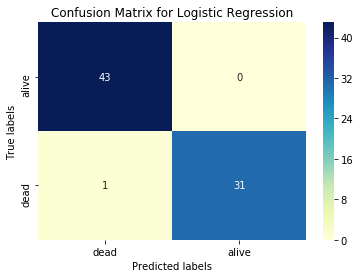

In [50]:
predLR = logisticRegr.predict(X_te)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_te, predLR)
np.set_printoptions(precision=2)
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Logistic Regression'); 
ax.xaxis.set_ticklabels(['dead', 'alive']); ax.yaxis.set_ticklabels(['alive', 'dead']);
#plt.savefig('confLog.png')
plt.show()

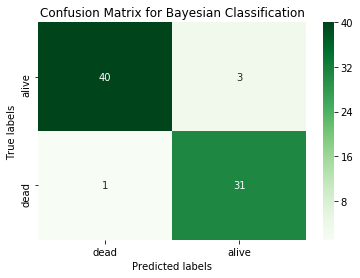

In [51]:
predB = bclf.predict(X_te)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_te, predB)
np.set_printoptions(precision=2)
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, ax = ax, cmap="Greens"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Bayesian Classification'); 
ax.xaxis.set_ticklabels(['dead', 'alive']); ax.yaxis.set_ticklabels(['alive', 'dead']);
#plt.savefig('confb.png')
plt.show()

## Precision Recall Report

In [52]:
print('Precision Recall Report Logistic Regression')
print(classification_report(y_te, predLR))

Precision Recall Report Logistic Regression
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        43
          1       1.00      0.97      0.98        32

avg / total       0.99      0.99      0.99        75



In [53]:
print('Precision Recall Report Bayesian Classification')
print(classification_report(y_te, predB))

Precision Recall Report Bayesian Classification
             precision    recall  f1-score   support

          0       0.98      0.93      0.95        43
          1       0.91      0.97      0.94        32

avg / total       0.95      0.95      0.95        75



## ROC Curves

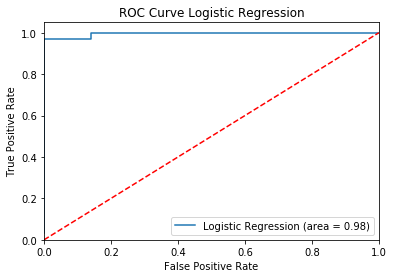

In [54]:
logit_roc_auc = roc_auc_score(y_te, predLR)
fpr, tpr, thresholds = roc_curve(y_te, logisticRegr.predict_proba(X_te)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend(loc="lower right")
#plt.savefig('rocLog.png')
plt.show()

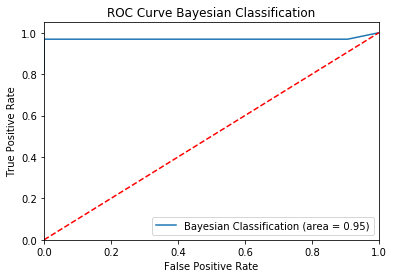

In [55]:
bayes_roc_auc = roc_auc_score(y_te, predB)
fpr, tpr, thresholds = roc_curve(y_te, bclf.predict_proba(X_te)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Bayesian Classification (area = %0.2f)' % bayes_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Bayesian Classification')
plt.legend(loc="lower right")
#plt.savefig('rocb.png')
plt.show()

# Conclusions

Both logistic regression and Bayesian classification display an excellent capability to determine whether a horse will live or die following a colic. Each method of evaluating the models shows that logistic regression is slightly better but not by much. Both of these methods are easy to interpret. We use three primary methods of evaluating. K-fold cross validation where we select k to be 10. Logistic regression's percent accuracy is 100%. This is most likely due to rounding since it is clear from later methods that while it is almost perfect it does make some errors in classification. Bayesian has a cross validation percent accuracy of 95.1%. The confusion matrices both show us where the misclassifications are happening. We see that logistic classifies one point incorrectly and Bayesian misclassified 4 points. We again see nearly perfect results for both methods when we look at the precision recall and ROC curves. The clear relationship between medical history and whether a horse lives or dies encourages many opportunities for further investigation in additional research projects.

# Future Work

The first thing that comes to mind for future work would be a more complete dataset. It would also be nice to try and understand methods that are most effective in a horse's survival. So one thing that is considered common knowledge is that if a horse in colic owner's need to continously walk the horse around. It would be good to get some predictor variables that relate to the course of treatment. Are horses with certain medical backgrounds destined to live or die regardless of treatment? Or are their healthcare teams picking different treatments based on their medical history? For example do older horses get less intensive treatments? There are many different ways we could investigate this question future research. 

# Sources

1. Holtz, Yan. “#92 Control Color in Seaborn Heatmaps.” The Python Graph Gallery, 13 Mar. 2018, python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/.

2. Li, Susan. “Building A Logistic Regression in Python, Step by Step.” Towards Data Science, Towards Data Science, 29 Sept. 2017, towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8.

3. “Sklearn Plot Confusion Matrix with Labels.” Stack Overflow, stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels.

4. “Tuning SVM : Bringing Accuracy from 62 % to 98.8 % | Kaggle.” Countries of the World | Kaggle, www.kaggle.com/himakund/tuning-svm-bringing-accuracy-from-62-to-98-8.

5. UCI. “Horse Colic Dataset | Kaggle.” Countries of the World | Kaggle, 6 June 2017, www.kaggle.com/uciml/horse-colic.


